In [34]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch

# tmp unused
from scipy.fft import fft, fftfreq
from scipy.signal import blackman, hamming, detrend
import scipy.signal as signal

In [62]:
# change the path_root here
path_root = '/Volumes/homes/_NeuralData/Changgung_BIS/4.13'
# path_root = 'Other path'

ch_num = 5
fs = 1000

In [63]:
# for mne object
ch_names = ['EEG{}'.format(i) for i in range(ch_num)]
ch_types = ['eeg' for i in range(ch_num)]
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=fs)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 5
 projs: []
 sfreq: 1000.0 Hz
>


path_tmp /Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP
csv_list ['/Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP/CA_46_B1_BF_97_28-1.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP/CA_46_B1_BF_97_28-2.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP/CA_46_B1_BF_97_28-3.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP/CA_46_B1_BF_97_28-4.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.13/2023-04-13_141205_huifushi_1/EP/CA_46_B1_BF_97_28-5.csv']
eeg.shape (5, 2056453)
duration(s): 2056.453
Creating RawArray with float64 data, n_channels=5, n_times=2056453
    Range : 0 ... 2056452 =      0.000 ...  2056.452 secs
Ready.


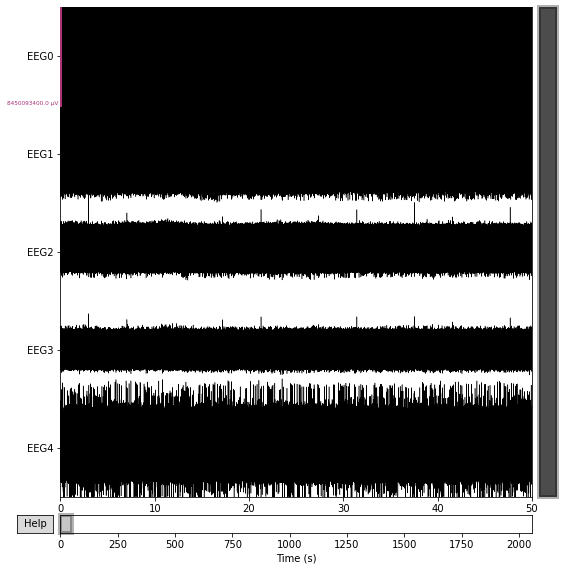

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_6013/3467591365.py:28: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c])


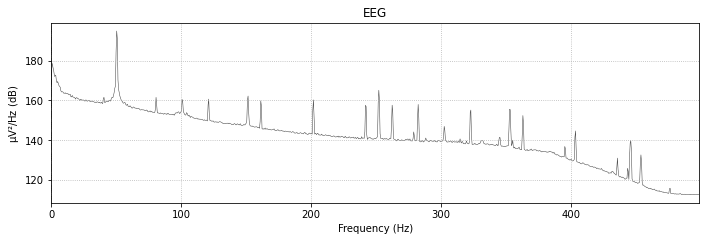

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_6013/3467591365.py:28: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c])


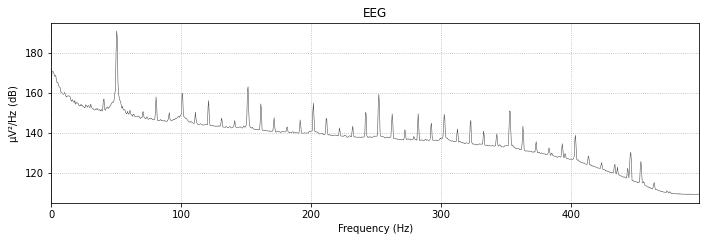

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_6013/3467591365.py:28: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c])


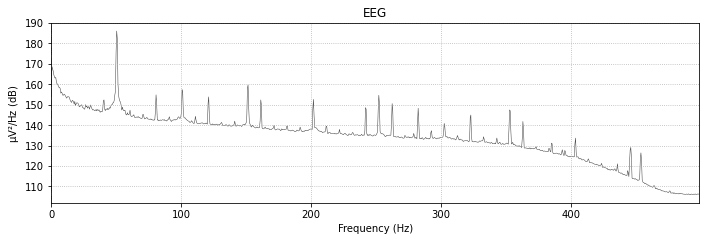

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_6013/3467591365.py:28: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c])


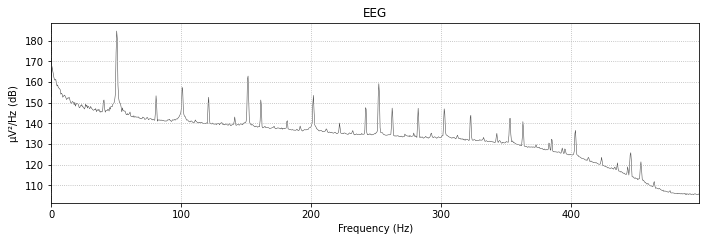

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_6013/3467591365.py:28: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c])


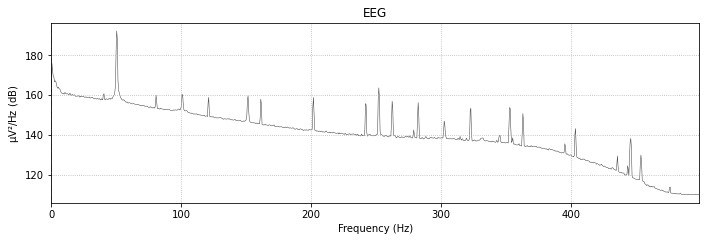

In [66]:
exp = os.listdir(path_root)

# for i in range(len(exp)):
for i in range(9,10):
    path_tmp = '{}/{}/EP'.format(path_root, exp[i])
    print('path_tmp', path_tmp)
    if os.path.exists(path_tmp):
        csv_list = []
        for root, _, filenames in os.walk(path_tmp):
            for filename in fnmatch.filter(filenames, '*.csv'):
                csv_list.append(os.path.join(root, filename))
        csv_list.sort()
        print('csv_list', csv_list)

    # read data of NeuraMatrix
    eeg = []
    for c in range(len(csv_list)):
        df = pd.read_csv('{}'.format(csv_list[c]), header=None)
        eeg.append(df[2])
    eeg = np.array(eeg)
    print('eeg.shape', eeg.shape)
    print('duration(s):', eeg.shape[1]/fs)

    my_raw = mne.io.RawArray(eeg, info)
    my_raw.plot(duration=50, remove_dc=False, scalings='auto')
    my_raw.plot_psd(fmax=499, average=True)
    # for c in ch_names:
    #     my_raw.plot_psd(fmax=499, average=False, picks=[c])

In [49]:
eeg.shape

(5, 8624379)

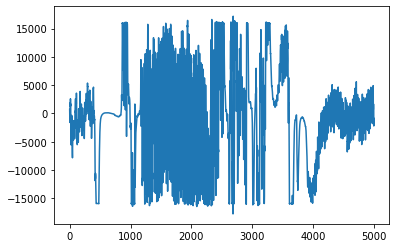

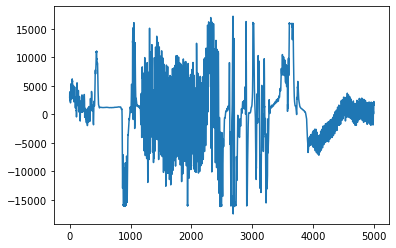

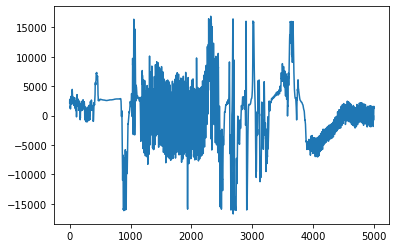

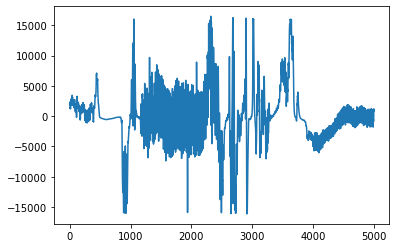

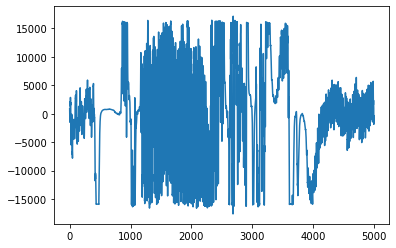

In [53]:
mon_s = 600
mon_e = 605
for i in range(eeg.shape[0]):
    plt.plot(eeg[i, mon_s*fs:mon_e*fs])
    plt.show()

In [30]:
# filters: to be used later
# my_raw.filter(l_freq=1, h_freq=35, picks=['EEG'])
# my_raw.notch_filter(freqs=[50,90,150], picks=['EEG'])
# my_raw.filter(l_freq=100, h_freq=499, picks=['EMG'])